In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("FIR_Details_Data.csv", low_memory=False)

In [3]:
df

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00.000,2015-12-27 12:05:00.000,2016-01-05 11:00:00.000,05/01/2016,...,0,1,1,0,1,1,0,2016000002,1245,10470124520160001
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00.000,2016-01-12 17:35:00.000,2016-01-12 19:00:00.000,12/01/2016,...,0,5,5,0,5,5,2,2016000003,1245,10470124520160002
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00.000,2016-01-12 17:50:00.000,2016-01-12 19:30:00.000,12/01/2016,...,0,1,1,0,1,1,0,2016000004,1245,10470124520160003
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00.000,2016-01-14 21:35:00.000,2016-01-15 14:00:00.000,15/01/2016,...,0,1,1,0,1,1,0,2016000005,1245,10470124520160004
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00.000,2016-01-18 15:05:00.000,2016-01-18 19:30:00.000,18/01/2016,...,0,1,1,0,1,1,0,2016000006,1245,10470124520160005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694186,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00.000,2024-01-10 21:30:00.000,2024-01-11 21:30:00.000,11/01/2024,...,0,0,0,0,0,0,0,2024000002,2183,10978218320240002
1694187,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00.000,2024-01-19 22:35:00.000,2024-01-29 19:30:00.000,29/01/2024,...,0,1,0,0,0,0,0,2024000003,2183,10978218320240003
1694188,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00.000,2024-02-06 15:45:00.000,2024-02-07 17:45:00.000,07/02/2024,...,0,1,0,0,0,0,0,2024000004,2183,10978218320240004
1694189,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00.000,2024-02-19 12:15:00.000,2024-02-24 17:00:00.000,24/02/2024,...,0,5,0,0,0,0,0,2024000005,2183,10978218320240005


In [4]:
df['Offence_From_Date'] = pd.to_datetime(df['Offence_From_Date'].astype(str), errors='coerce')
df['Offence_From_Date'] = pd.to_datetime(df['Offence_From_Date'], format = '%Y/%m/%d %S:%M:%H')

In [5]:
df['Offence_To_Date'] = pd.to_datetime(df['Offence_To_Date'].astype(str), errors='coerce')
df['Offence_To_Date'] = pd.to_datetime(df['Offence_To_Date'], format = '%Y/%m/%d %S:%M:%H')

In [6]:
df['FIR_Date'] = pd.to_datetime(df['FIR_Date'].astype(str), errors='coerce')
df['FIR_Date'] = pd.to_datetime(df['FIR_Date'], format = '%d/%m/%Y %H:%M:%S')

In [7]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'IOAssigned_Date', 'Internal_IO', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female',
       'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count',
       'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.',
       'Accused_ChargeSheeted Count', 'Conviction Count', 'FIR_ID', 'Unit_ID',
       'Crime_No'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694191 entries, 0 to 1694190
Data columns (total 41 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   District_Name                object        
 1   UnitName                     object        
 2   FIRNo                        object        
 3   RI                           int64         
 4   Year                         int64         
 5   Month                        int64         
 6   Offence_From_Date            datetime64[ns]
 7   Offence_To_Date              datetime64[ns]
 8   FIR_Reg_DateTime             object        
 9   FIR_Date                     datetime64[ns]
 10  FIR Type                     object        
 11  FIR_Stage                    object        
 12  Complaint_Mode               object        
 13  CrimeGroup_Name              object        
 14  CrimeHead_Name               object        
 15  Latitude                     float64       
 16  

In [9]:
df.isnull().sum()

District_Name                        0
UnitName                             0
FIRNo                                0
RI                                   0
Year                                 0
Month                                0
Offence_From_Date                    0
Offence_To_Date                      1
FIR_Reg_DateTime                     0
FIR_Date                       1017691
FIR Type                             2
FIR_Stage                            0
Complaint_Mode                   18430
CrimeGroup_Name                      0
CrimeHead_Name                       0
Latitude                             5
Longitude                            5
ActSection                          42
IOName                             150
KGID                               150
IOAssigned_Date                1694182
Internal_IO                          0
Place of Offence                     0
Distance from PS                   567
Beat_Name                          197
Village_Area_Name        

In [10]:
df = df.drop('FIR_Date', axis=1)

In [11]:
df.dropna(subset=['Distance from PS'],inplace=True)

In [12]:
df.dropna(subset=['Village_Area_Name'],inplace=True)

In [13]:
df.dropna(subset=['Beat_Name'],inplace=True)

In [14]:
df.dropna(subset=['IOName'],inplace=True)

In [15]:
df.dropna(subset=['KGID'],inplace=True)

In [16]:
df.dropna(subset=['ActSection'],inplace=True)

In [17]:
df.drop(columns=['IOAssigned_Date'],inplace=True)

In [18]:
df

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR Type,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00.000,Non Heinous,...,0,1,1,0,1,1,0,2016000002,1245,10470124520160001
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00.000,Non Heinous,...,0,5,5,0,5,5,2,2016000003,1245,10470124520160002
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00.000,Non Heinous,...,0,1,1,0,1,1,0,2016000004,1245,10470124520160003
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00.000,Non Heinous,...,0,1,1,0,1,1,0,2016000005,1245,10470124520160004
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00.000,Heinous,...,0,1,1,0,1,1,0,2016000006,1245,10470124520160005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694186,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00,2024-01-10 21:30:00,2024-01-11 21:30:00.000,Non Heinous,...,0,0,0,0,0,0,0,2024000002,2183,10978218320240002
1694187,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00,2024-01-19 22:35:00,2024-01-29 19:30:00.000,Heinous,...,0,1,0,0,0,0,0,2024000003,2183,10978218320240003
1694188,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00,2024-02-06 15:45:00,2024-02-07 17:45:00.000,Non Heinous,...,0,1,0,0,0,0,0,2024000004,2183,10978218320240004
1694189,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00,2024-02-19 12:15:00,2024-02-24 17:00:00.000,Heinous,...,0,5,0,0,0,0,0,2024000005,2183,10978218320240005


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1693164 entries, 0 to 1694190
Data columns (total 39 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   District_Name                object        
 1   UnitName                     object        
 2   FIRNo                        object        
 3   RI                           int64         
 4   Year                         int64         
 5   Month                        int64         
 6   Offence_From_Date            datetime64[ns]
 7   Offence_To_Date              datetime64[ns]
 8   FIR_Reg_DateTime             object        
 9   FIR Type                     object        
 10  FIR_Stage                    object        
 11  Complaint_Mode               object        
 12  CrimeGroup_Name              object        
 13  CrimeHead_Name               object        
 14  Latitude                     float64       
 15  Longitude                    float64       
 16  ActSe

In [20]:
df['Beat_Name']

0          RURAL BEAT NO 13
1           RURAL BEAT NO 6
2           RURAL BEAT NO 6
3          RURAL BEAT NO 13
4          RURAL BEAT NO 16
                 ...       
1694186           BEAT NO 1
1694187           BEAT NO 2
1694188           BEAT NO 5
1694189           BEAT NO 1
1694190           BEAT NO 2
Name: Beat_Name, Length: 1693164, dtype: object

In [21]:
df['Complaint_Mode']

0                     Written
1          Sue-moto by Police
2          Sue-moto by Police
3                     Written
4                     Written
                  ...        
1694186               Written
1694187               Written
1694188               Written
1694189               Written
1694190               Written
Name: Complaint_Mode, Length: 1693164, dtype: object

In [22]:
df['Complaint_Mode'].value_counts()

Complaint_Mode
Written                                      1112123
Sue-moto by Police                            269431
Oral                                          143225
Others                                         98993
Judicial/Magistrate reference                  29344
Written & Organised                             8957
Oral & Organised                                5931
Online                                          5028
Judicial/Magistrate Reference & Organised       1654
Distress call over phone                          56
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Complaint_Mode'>

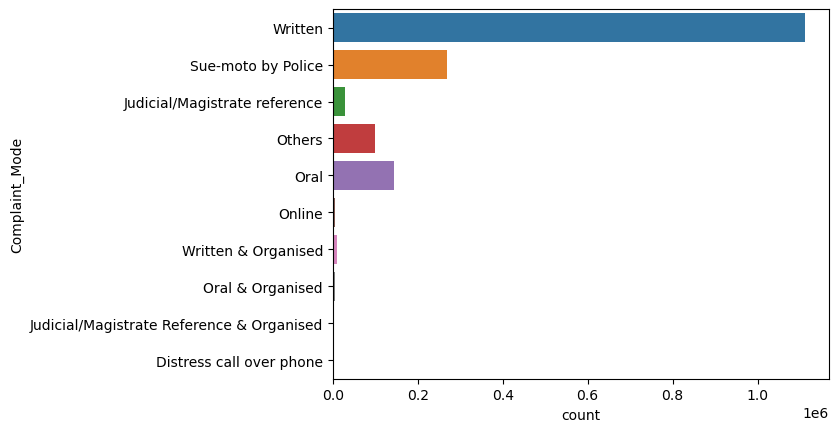

In [23]:
sns.countplot(y=df['Complaint_Mode'],data=df)

In [24]:
df.fillna(df['Complaint_Mode'].mode(),inplace=True)

In [25]:
df=df.dropna()

In [26]:
df.isnull().sum()

District_Name                  0
UnitName                       0
FIRNo                          0
RI                             0
Year                           0
Month                          0
Offence_From_Date              0
Offence_To_Date                0
FIR_Reg_DateTime               0
FIR Type                       0
FIR_Stage                      0
Complaint_Mode                 0
CrimeGroup_Name                0
CrimeHead_Name                 0
Latitude                       0
Longitude                      0
ActSection                     0
IOName                         0
KGID                           0
Internal_IO                    0
Place of Offence               0
Distance from PS               0
Beat_Name                      0
Village_Area_Name              0
Male                           0
Female                         0
Boy                            0
Girl                           0
Age 0                          0
VICTIM COUNT                   0
Accused Co

In [27]:
df[(df['District_Name']=="Bagalkot") & (df['FIRNo']=="0001/2016")]

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR Type,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00.000,Non Heinous,...,0,1,1,0,1,1,0,2016000002,1245,10470124520160001
1333,Bagalkot,Badami PS,0001/2016,1,2016,1,2016-01-03 15:00:00,2016-01-03 15:01:00,2016-01-03 18:45:00.000,Heinous,...,0,1,0,0,0,1,0,2016000001,1246,10470124620160001
3247,Bagalkot,Bagalkot Rural PS,0001/2016,1,2016,1,2016-01-01 08:29:00,2016-01-01 08:30:00,2016-01-01 13:00:00.000,Non Heinous,...,0,1,1,0,1,1,0,2016000001,1238,10470123820160001
5337,Bagalkot,Bagalkot Town PS,0001/2016,1,2016,1,2016-01-18 16:00:00,2016-01-18 16:45:00,2016-01-18 18:30:00.000,Non Heinous,...,0,2,2,0,2,2,0,2016000001,1236,10470123620160001
6292,Bagalkot,Bagalkot Traffic PS,0001/2016,1,2016,1,2016-01-01 10:00:00,2016-01-01 10:05:00,2016-01-01 15:30:00.000,Non Heinous,...,0,0,1,0,1,1,1,2016000001,1237,10470123720160001
7046,Bagalkot,Banahatti PS,0001/2016,1,2016,1,2015-12-31 17:30:00,2015-12-31 17:31:00,2016-01-01 14:00:00.000,Non Heinous,...,0,5,1,0,1,5,0,2016000001,1259,10470125920160001
8210,Bagalkot,Bilagi PS,0001/2016,1,2016,1,2016-01-01 00:30:00,2016-01-01 00:31:00,2016-01-01 02:00:00.000,Non Heinous,...,0,2,2,0,2,2,0,2016000001,1263,10470126320160001
10004,Bagalkot,Guledagudda PS,0001/2016,1,2016,1,2016-01-02 15:30:00,2016-01-02 15:31:00,2016-01-02 17:15:00.000,Non Heinous,...,0,1,0,0,0,1,1,2016000001,1249,10470124920160001
10917,Bagalkot,Hungunda PS,0001/2016,1,2016,1,2016-01-01 02:40:00,2016-01-01 02:41:00,2016-01-01 13:30:00.000,Heinous,...,0,0,0,0,0,0,0,2016000001,1241,10470124120160001
12530,Bagalkot,Ilakal PS,0001/2016,1,2016,1,2016-01-08 19:30:00,2016-01-08 19:31:00,2016-01-08 21:15:00.000,Non Heinous,...,0,1,1,0,1,1,0,2016000002,1242,10470124220160001


<Axes: xlabel='count', ylabel='District_Name'>

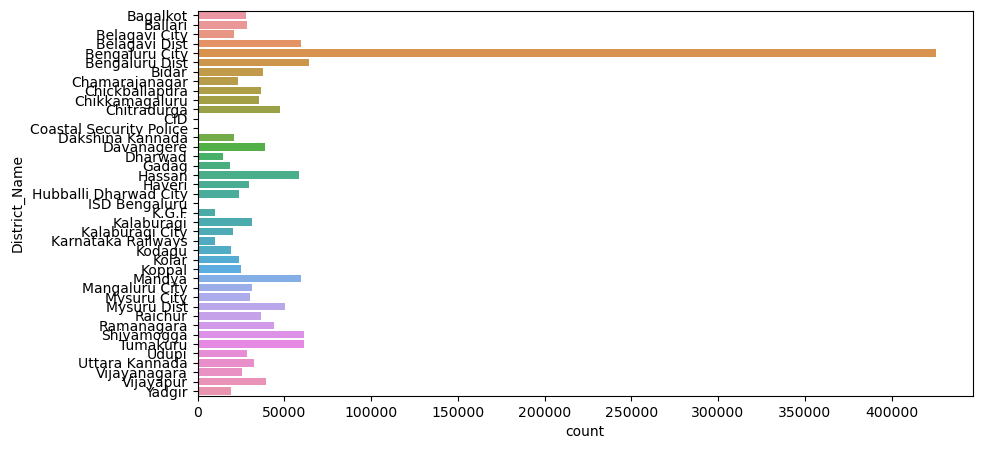

In [28]:
fig=plt.figure(figsize=(10,5))
sns.countplot(y='District_Name',data=df)

In [29]:
ban=df[df['District_Name']=="Bengaluru City"]

In [30]:
ban

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR Type,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
138066,Bengaluru City,Adugodi PS,0001/2016,1,2016,1,2016-01-01 01:00:00,2016-01-01 01:05:00,2016-01-01 01:30:00.000,Non Heinous,...,0,1,1,0,1,1,0,2016000001,1382,10443138220160001
138067,Bengaluru City,Adugodi PS,0002/2016,1,2016,1,2015-12-29 09:30:00,2015-12-29 09:35:00,2016-01-02 17:40:00.000,Non Heinous,...,0,2,1,1,2,3,0,2016000002,1382,10443138220160002
138069,Bengaluru City,Adugodi PS,0004/2016,1,2016,1,2016-01-03 18:00:00,2016-01-03 18:10:00,2016-01-07 21:45:00.000,Non Heinous,...,0,3,1,2,3,3,0,2016000004,1382,10443138220160004
138070,Bengaluru City,Adugodi PS,0005/2016,1,2016,1,2012-07-28 10:00:00,2015-08-10 10:00:00,2016-01-08 17:50:00.000,Non Heinous,...,0,1,2,0,2,1,0,2016000005,1382,10443138220160005
138071,Bengaluru City,Adugodi PS,0006/2016,1,2016,1,2016-01-14 01:00:00,2016-01-14 01:05:00,2016-01-14 01:45:00.000,Heinous,...,0,1,3,0,3,3,0,2016000010,1382,10443138220160006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568815,Bengaluru City,Yeshwanthapura Traffic PS,0019/2024,1,2024,2,2024-02-26 07:30:00,2024-02-26 07:35:00,2024-02-26 14:00:00.000,Non Heinous,...,0,1,0,0,0,0,0,2024000019,1782,10443178220240019
568816,Bengaluru City,Yeshwanthapura Traffic PS,0020/2024,1,2024,2,2024-02-26 17:30:00,2024-02-26 17:55:00,2024-02-26 21:30:00.000,Heinous,...,0,2,0,0,0,0,0,2024000020,1782,10443178220240020
568817,Bengaluru City,Yeshwanthapura Traffic PS,0021/2024,1,2024,3,2024-03-01 16:30:00,2024-03-01 16:35:00,2024-03-02 20:15:00.000,Non Heinous,...,0,1,0,0,0,0,0,2024000022,1782,10443178220240021
568818,Bengaluru City,Yeshwanthapura Traffic PS,0022/2024,1,2024,3,2024-03-04 08:25:00,2024-03-04 08:30:00,2024-03-04 21:30:00.000,Heinous,...,0,1,0,0,0,0,0,2024000023,1782,10443178220240022


In [31]:
ban_crime=ban['CrimeGroup_Name'].value_counts().head()

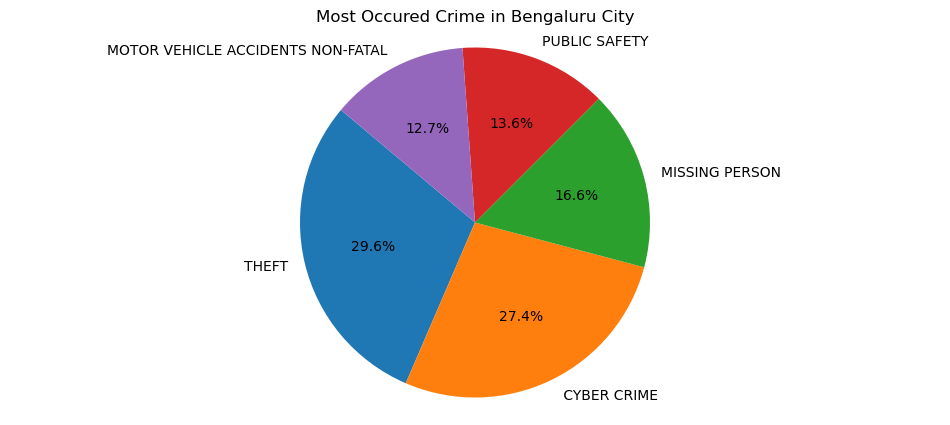

In [32]:
fig=plt.figure(figsize=(12,5))
plt.pie(ban_crime,labels=ban_crime.index,autopct='%1.1f%%', startangle=140)
plt.title('Most Occured Crime in Bengaluru City')
plt.axis("equal")
plt.show()

In [33]:
karcrime=df['CrimeGroup_Name'].value_counts().head(10)

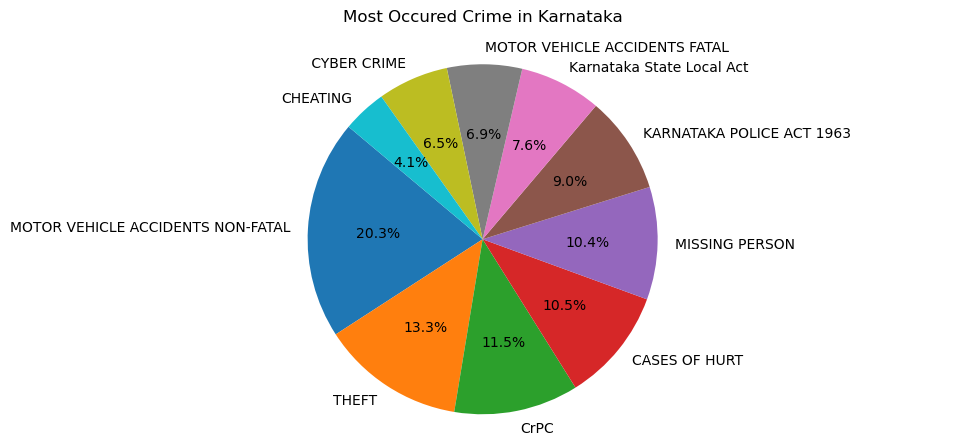

In [34]:
fig=plt.figure(figsize=(12,5))
plt.pie(karcrime,labels=karcrime.index,autopct='%1.1f%%',startangle=140)
plt.title('Most Occured Crime in Karnataka\n')
plt.axis("equal")
plt.show()

<Axes: xlabel='Year', ylabel='count'>

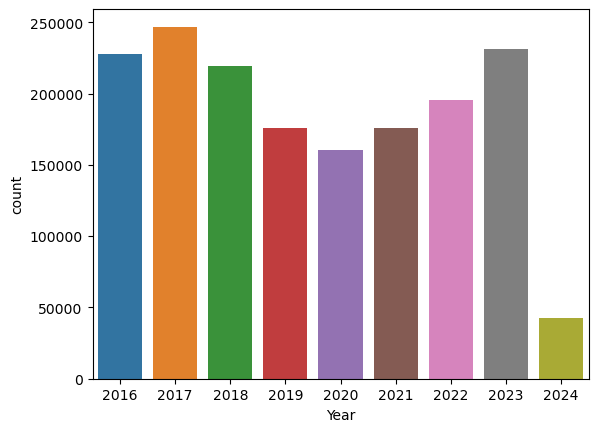

In [35]:
sns.countplot(x=df['Year'],data=df)

In [36]:
lat=df[df['Latitude']==0]

In [37]:
lat[['Latitude','Longitude','Village_Area_Name']]

,Latitude,Longitude,Village_Area_Name
0,0.0,0.0,KAMATAGI
1,0.0,0.0,SULEBAVI
2,0.0,0.0,SULEBAVI
3,0.0,0.0,KAMATAGI
4,0.0,0.0,MADAPUR
...,...,...,...
1694169,0.0,0.0,YADGIRI RURAL PS LIMITS
1694170,0.0,0.0,WADIGERA PS LIMITS
1694171,0.0,0.0,YADGIRI RURAL PS LIMITS
1694172,0.0,0.0,WADIGERA PS LIMITS


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1674734 entries, 0 to 1694190
Data columns (total 39 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   District_Name                1674734 non-null  object        
 1   UnitName                     1674734 non-null  object        
 2   FIRNo                        1674734 non-null  object        
 3   RI                           1674734 non-null  int64         
 4   Year                         1674734 non-null  int64         
 5   Month                        1674734 non-null  int64         
 6   Offence_From_Date            1674734 non-null  datetime64[ns]
 7   Offence_To_Date              1674734 non-null  datetime64[ns]
 8   FIR_Reg_DateTime             1674734 non-null  object        
 9   FIR Type                     1674734 non-null  object        
 10  FIR_Stage                    1674734 non-null  object        
 11  Complaint_Mode  

In [39]:
df.isnull().sum()

District_Name                  0
UnitName                       0
FIRNo                          0
RI                             0
Year                           0
Month                          0
Offence_From_Date              0
Offence_To_Date                0
FIR_Reg_DateTime               0
FIR Type                       0
FIR_Stage                      0
Complaint_Mode                 0
CrimeGroup_Name                0
CrimeHead_Name                 0
Latitude                       0
Longitude                      0
ActSection                     0
IOName                         0
KGID                           0
Internal_IO                    0
Place of Offence               0
Distance from PS               0
Beat_Name                      0
Village_Area_Name              0
Male                           0
Female                         0
Boy                            0
Girl                           0
Age 0                          0
VICTIM COUNT                   0
Accused Co

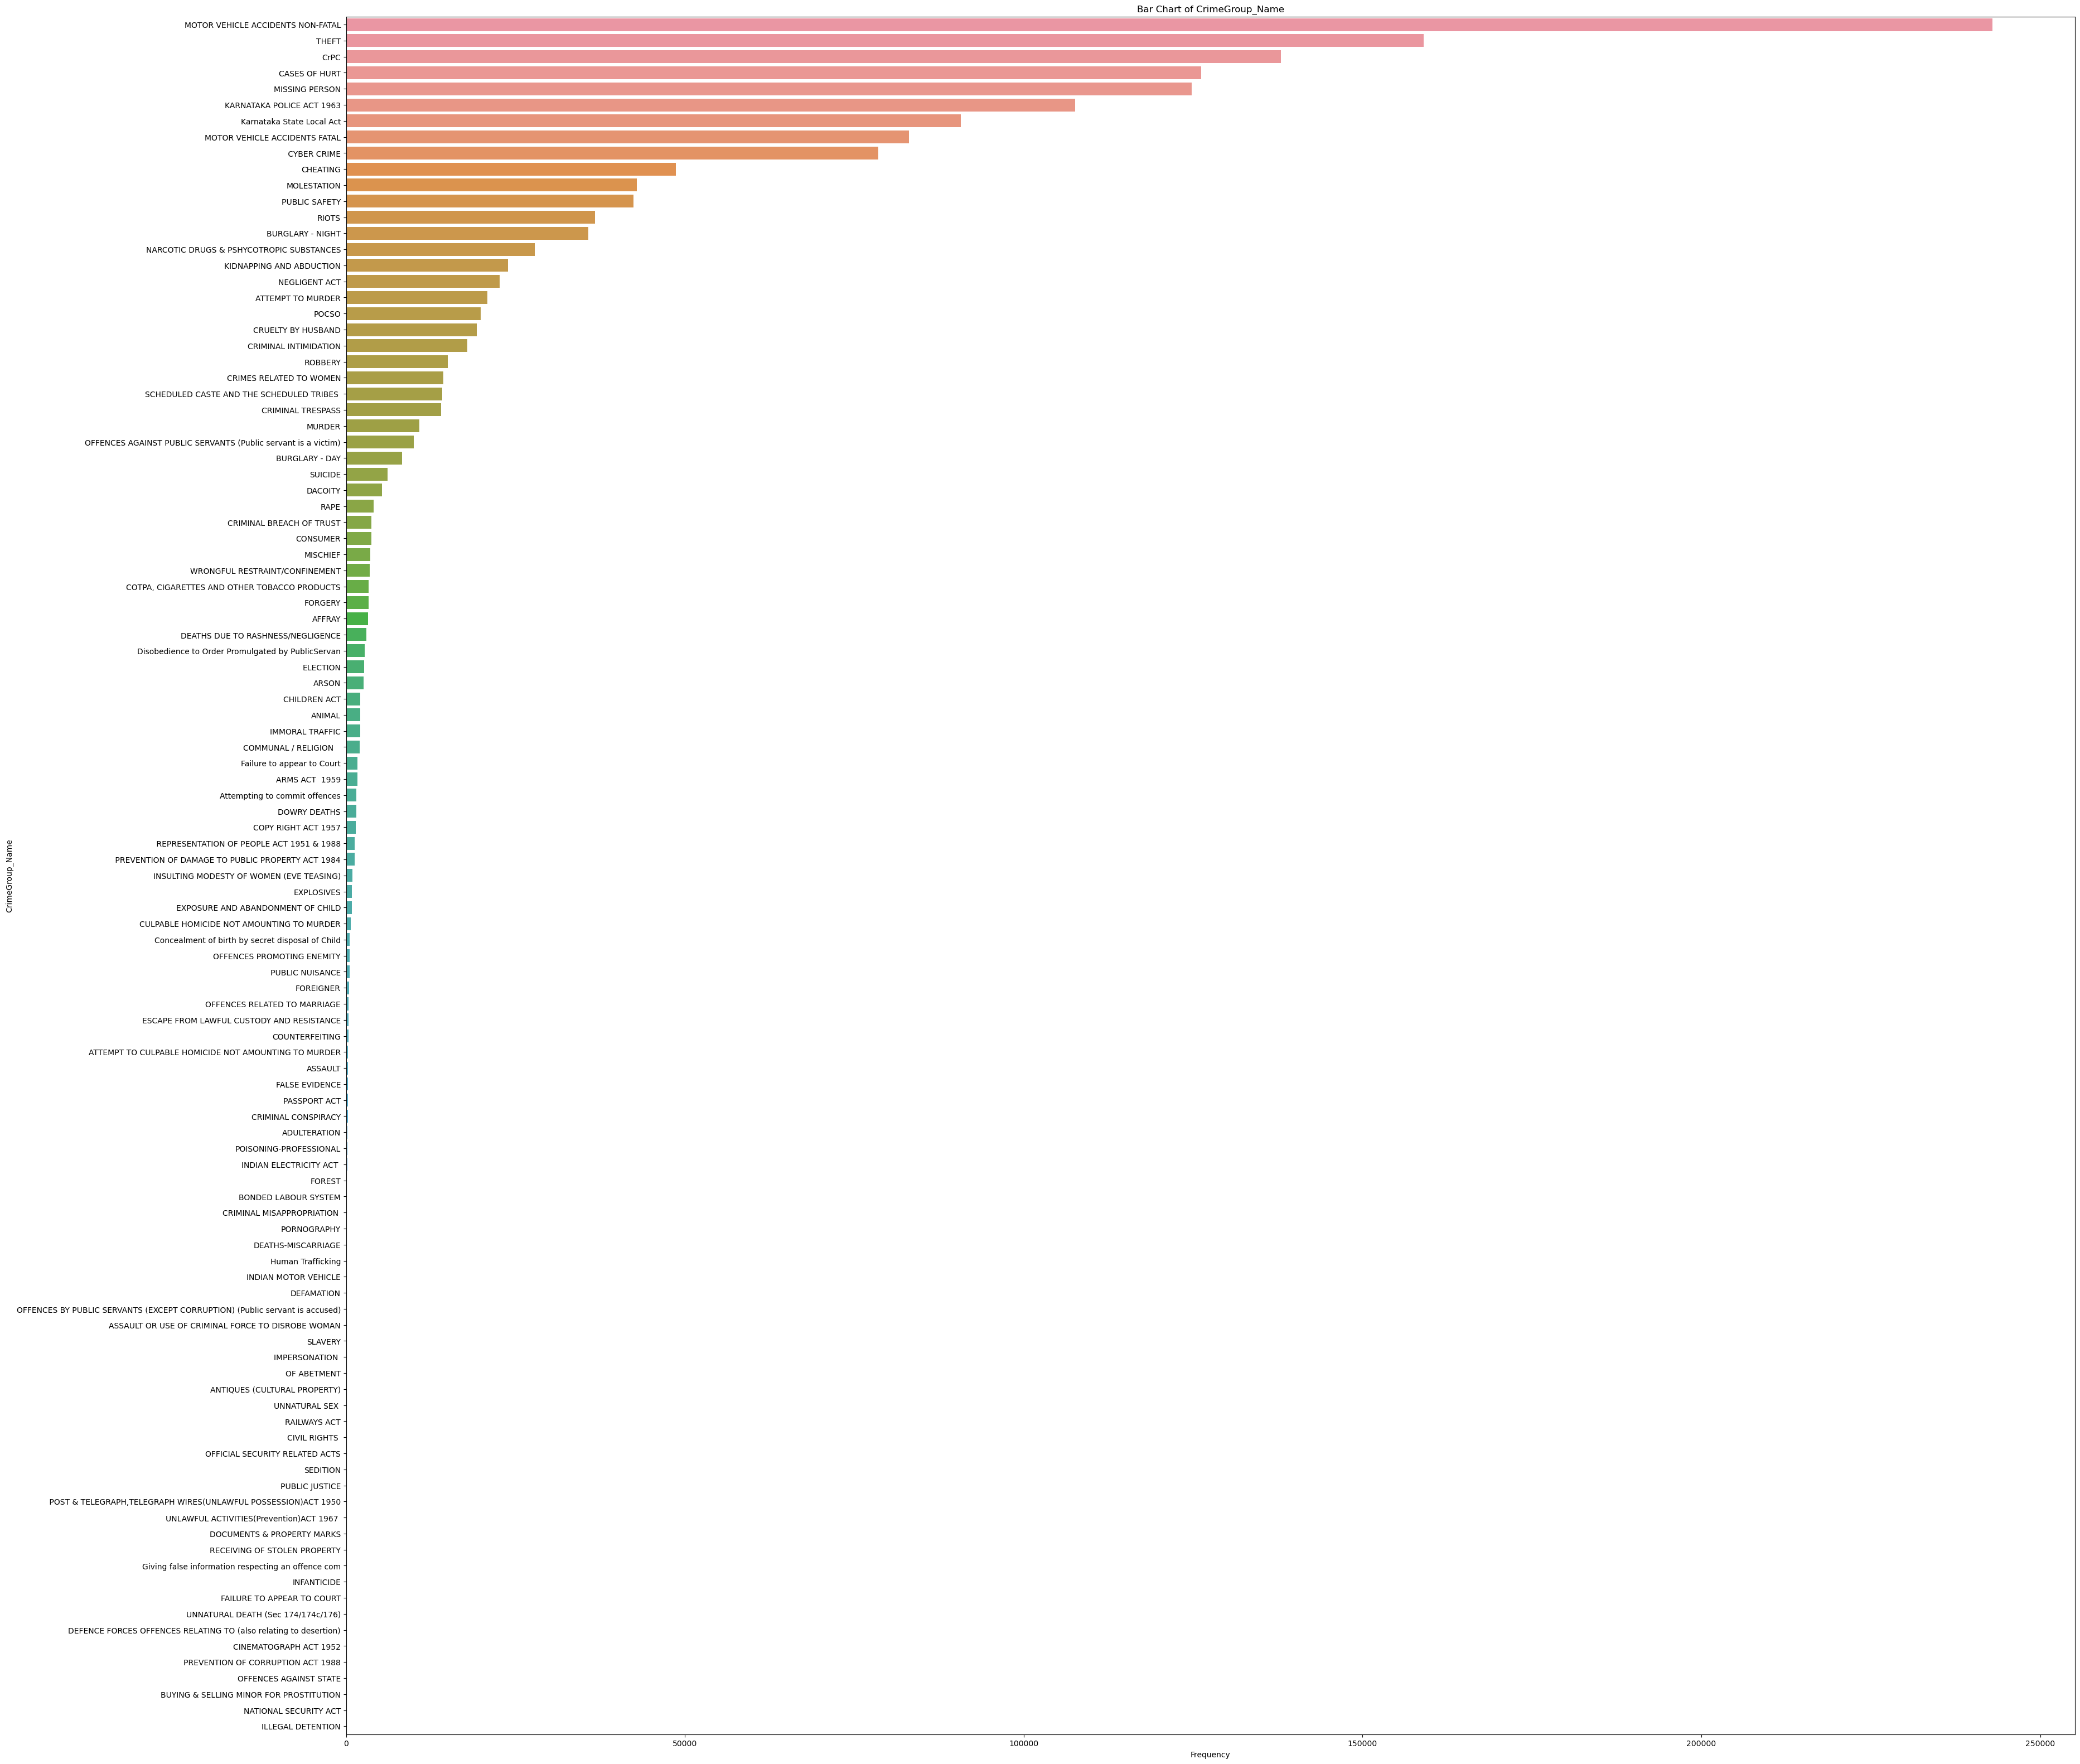

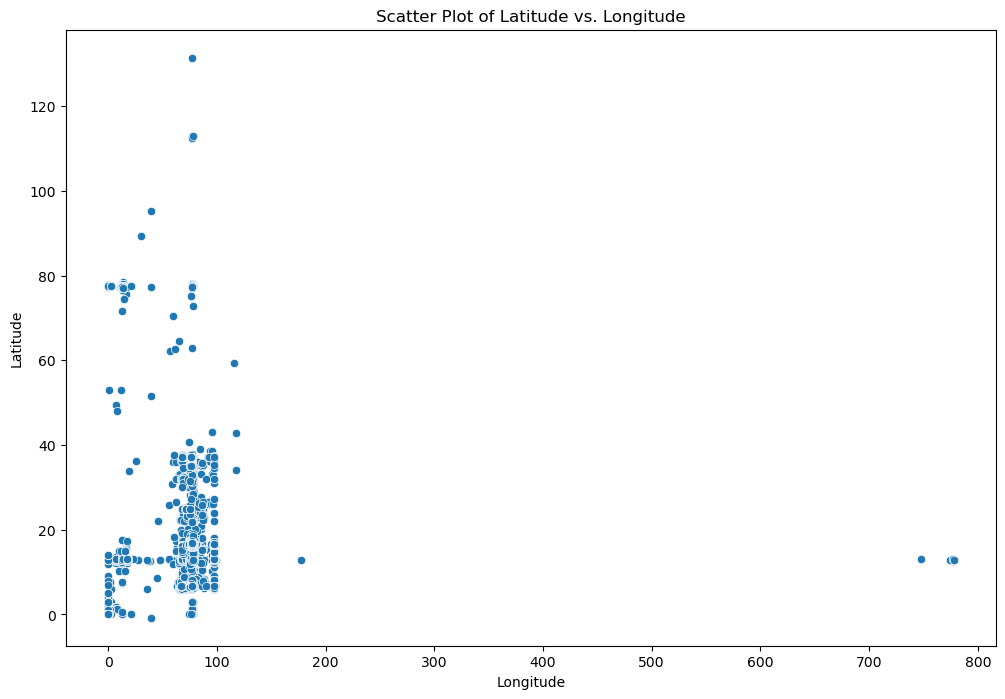

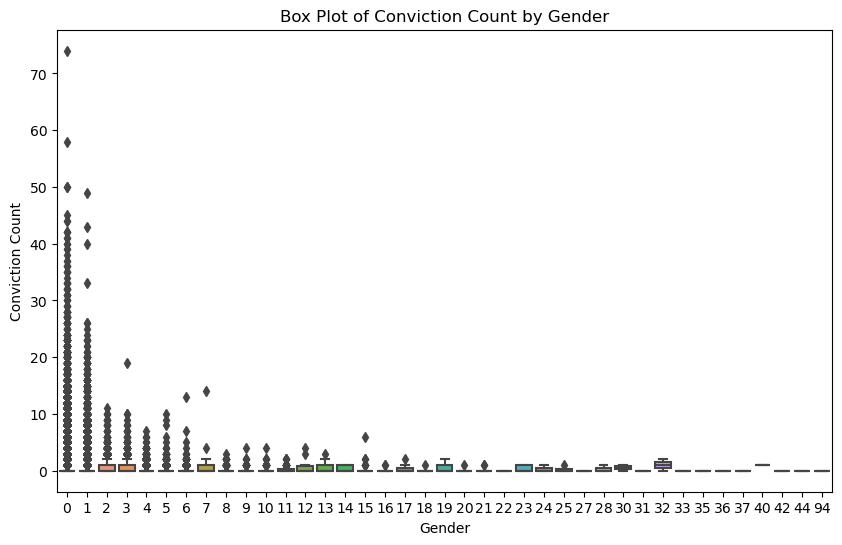

C:\Users\HP\AppData\Local\Temp\ipykernel_3648\2383308041.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


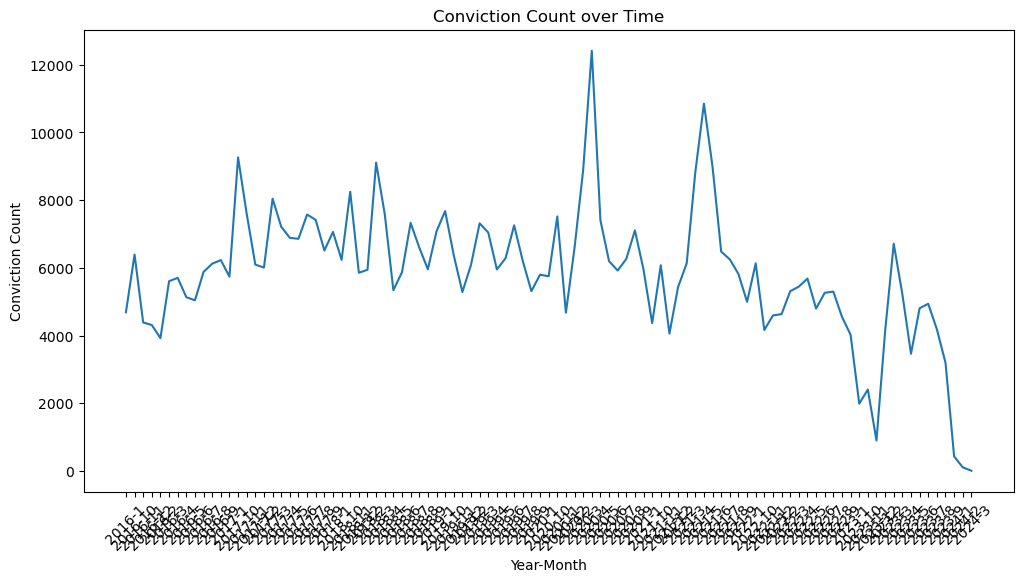

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# If your DataFrame is stored in a different variable, replace 'df' with your variable name




# Bar Chart of CrimeGroup_Name
plt.figure(figsize=(40, 40))
sns.countplot(y='CrimeGroup_Name', data=df, order=df['CrimeGroup_Name'].value_counts().index)
plt.title('Bar Chart of CrimeGroup_Name')
plt.xlabel('Frequency')
plt.ylabel('CrimeGroup_Name')
plt.show()

# Scatter Plot of Latitude vs. Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Box Plot of Conviction Count by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Male', y='Conviction Count', data=df)
plt.title('Box Plot of Conviction Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Conviction Count')
plt.show()

# Line Plot of Conviction Count over Time
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
conviction_by_month = df.groupby('Year_Month')['Conviction Count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='Conviction Count', data=conviction_by_month)
plt.xticks(rotation=45)
plt.title('Conviction Count over Time')
plt.xlabel('Year-Month')
plt.ylabel('Conviction Count')
plt.show()


In [41]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming your DataFrame is named 'df'
# If your DataFrame is stored in a different variable, replace 'df' with your variable name
df['Coordinates'] = list(zip(df['Longitude'], df['Latitude']))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

# Optional: Set the coordinate reference system (CRS) of the GeoDataFrame
# gdf.crs = 'EPSG:4326'  # WGS84


C:\Users\HP\AppData\Local\Temp\ipykernel_3648\3237185196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Coordinates'] = list(zip(df['Longitude'], df['Latitude']))
C:\Users\HP\AppData\Local\Temp\ipykernel_3648\3237185196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Coordinates'] = df['Coordinates'].apply(Point)


In [42]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Add the heatmap layer
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf['Coordinates']]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file or display it
m.save('heatmap.html')



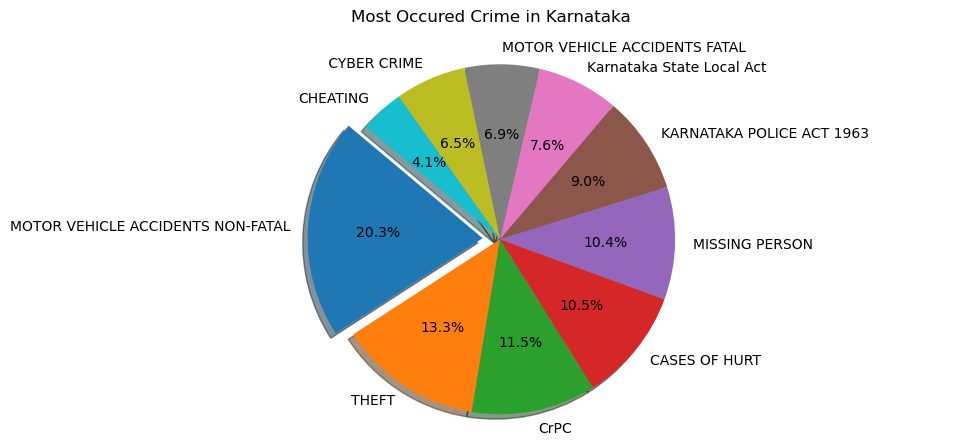

In [43]:
karcrime=df['CrimeGroup_Name'].value_counts().head(10)
fig = plt.figure(figsize=(12, 5))
max_crime_category = karcrime.idxmax()
explode = [0.1 if label == max_crime_category else 0 for label in karcrime.index]
plt.pie(karcrime, labels=karcrime.index, autopct='%1.1f%%', startangle=140, explode=explode,shadow=True)
plt.title('Most Occured Crime in Karnataka\n')
plt.axis("equal")
plt.show()


C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

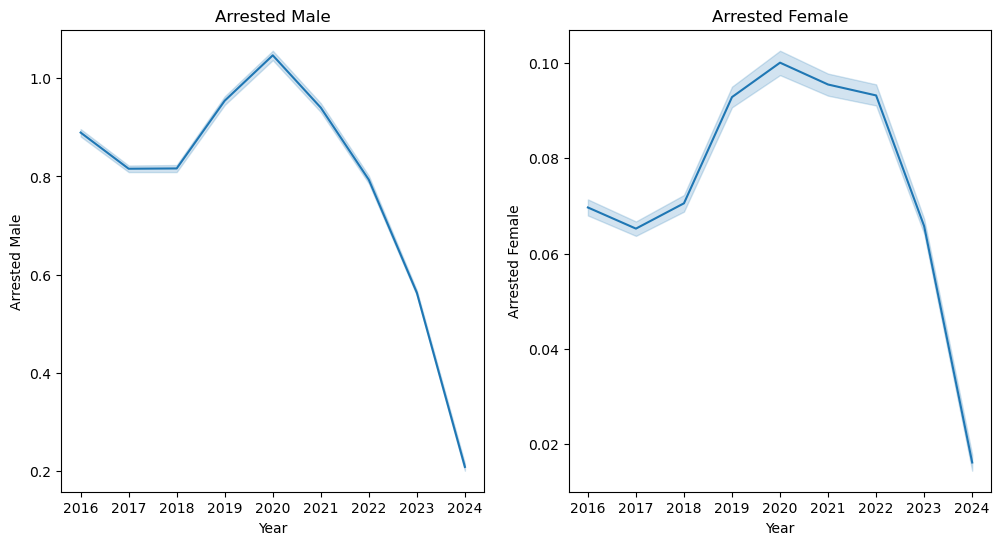

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
sns.lineplot(x="Year", y="Arrested Male", ax=axes[0],data=df)
axes[0].set_title('Arrested Male')
sns.lineplot(x="Year", y="Arrested Female", ax=axes[1],data=df)
axes[1].set_title('Arrested Female')
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1674734 entries, 0 to 1694190
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   District_Name                1674734 non-null  object        
 1   UnitName                     1674734 non-null  object        
 2   FIRNo                        1674734 non-null  object        
 3   RI                           1674734 non-null  int64         
 4   Year                         1674734 non-null  int64         
 5   Month                        1674734 non-null  int64         
 6   Offence_From_Date            1674734 non-null  datetime64[ns]
 7   Offence_To_Date              1674734 non-null  datetime64[ns]
 8   FIR_Reg_DateTime             1674734 non-null  object        
 9   FIR Type                     1674734 non-null  object        
 10  FIR_Stage                    1674734 non-null  object        
 11  Complaint_Mode  

In [46]:
fir_df=df

In [47]:
df.to_csv('preprocessed_df1.csv', index=False)

In [48]:
(df.CrimeGroup_Name.unique())

array(['POCSO', 'KARNATAKA POLICE ACT 1963',
       'MOTOR VEHICLE ACCIDENTS NON-FATAL',
       'MOTOR VEHICLE ACCIDENTS FATAL', 'THEFT', 'CrPC',
       'CRUELTY BY HUSBAND', 'ATTEMPT TO MURDER', 'CHEATING',
       'Karnataka State Local Act', 'ELECTION',
       ' REPRESENTATION OF PEOPLE ACT 1951 & 1988', 'MOLESTATION',
       'MISSING PERSON', 'CASES OF HURT', 'FORGERY',
       'SCHEDULED CASTE AND THE SCHEDULED TRIBES ', 'BURGLARY - NIGHT',
       'NEGLIGENT ACT', 'MURDER', 'RIOTS',
       'Attempting to commit offences', 'KIDNAPPING AND ABDUCTION',
       'EXPLOSIVES', 'EXPOSURE AND ABANDONMENT OF CHILD', 'ARSON',
       'CONSUMER',
       'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)',
       'CRIMES RELATED TO WOMEN', 'DEATHS DUE TO RASHNESS/NEGLIGENCE',
       'COMMUNAL / RELIGION   ', 'DOWRY DEATHS',
       'CRIMINAL BREACH OF TRUST', 'DACOITY',
       ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984',
       'BURGLARY - DAY', 'ANIMAL', 'MISCHIEF',
       'IN

In [49]:
# Define the mapping dictionary
crime_mapping = {
    'POCSO': 'Sexual Offenses',
    'MOTOR VEHICLE ACCIDENTS NON-FATAL': 'Vehicle Accidents',
    'MOTOR VEHICLE ACCIDENTS FATAL': 'Vehicle Accidents',
    'THEFT': 'Theft',
    'CrPC': 'CrPC',
    # Add more mappings as needed
}

# Replace the crime group names with the new categories
fir_df['CrimeGroup_Name'] = fir_df['CrimeGroup_Name'].replace(crime_mapping)

# Check the unique values after mapping
print(fir_df['CrimeGroup_Name'].unique())


['Sexual Offenses' 'KARNATAKA POLICE ACT 1963' 'Vehicle Accidents' 'Theft'
 'CrPC' 'CRUELTY BY HUSBAND' 'ATTEMPT TO MURDER' 'CHEATING'
 'Karnataka State Local Act' 'ELECTION'
 ' REPRESENTATION OF PEOPLE ACT 1951 & 1988' 'MOLESTATION'
 'MISSING PERSON' 'CASES OF HURT' 'FORGERY'
 'SCHEDULED CASTE AND THE SCHEDULED TRIBES ' 'BURGLARY - NIGHT'
 'NEGLIGENT ACT' 'MURDER' 'RIOTS' 'Attempting to commit offences'
 'KIDNAPPING AND ABDUCTION' 'EXPLOSIVES'
 'EXPOSURE AND ABANDONMENT OF CHILD' 'ARSON' 'CONSUMER'
 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)'
 'CRIMES RELATED TO WOMEN' 'DEATHS DUE TO RASHNESS/NEGLIGENCE'
 'COMMUNAL / RELIGION   ' 'DOWRY DEATHS' 'CRIMINAL BREACH OF TRUST'
 'DACOITY' ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984'
 'BURGLARY - DAY' 'ANIMAL' 'MISCHIEF'
 'INSULTING MODESTY OF WOMEN (EVE TEASING)' 'CRIMINAL TRESPASS'
 'CRIMINAL INTIMIDATION' 'CRIMINAL CONSPIRACY' 'SUICIDE'
 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTANCES' 'PUBLIC SAFETY' 'CHILDREN ACT'
 '

C:\Users\HP\AppData\Local\Temp\ipykernel_3648\3145037975.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fir_df['CrimeGroup_Name'] = fir_df['CrimeGroup_Name'].replace(crime_mapping)
